In [11]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
prediction,data,id_ = load_csv_data("train.csv", sub_sample=True)

In [9]:
x,mean_x,std_x = standardize(data)
y,tx = build_model_data(prediction,x)

In [10]:
y.shape, tx.shape

((5000,), (5000, 31))

In [12]:
# Define the parameters of the algorithm.
max_iters = 5
gamma = 0.005

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/4): loss=0.5
Gradient Descent(1/4): loss=0.4830546532769335
Gradient Descent(2/4): loss=0.46984227919614713
Gradient Descent(3/4): loss=0.4595309472421537
Gradient Descent(4/4): loss=0.45147423932391667
Gradient Descent: execution time=0.004 seconds


In [13]:
# Define the parameters of the algorithm.
max_iters = 5
gamma = 0.005
batch_size = 1

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/4): loss=0.45271004105397533
SGD(1/4): loss=0.43006844068795097
SGD(2/4): loss=0.4239013290985155
SGD(3/4): loss=0.42558788392022573
SGD(4/4): loss=0.42435330011960193
SGD: execution time=0.006 seconds


In [14]:
weights = least_squares(y, tx)
# compute RMSE
mse = compute_loss(y, tx, weights)
rmse = np.sqrt(2 * mse)

print("Least Squares, rmse={loss}".format(loss=rmse)) 

Least Squares, rmse=0.8065396533937648


proportion=0.9, degree=7, lambda=0.000, Training RMSE=0.745, Testing RMSE=0.904
proportion=0.9, degree=7, lambda=0.000, Training RMSE=0.746, Testing RMSE=0.891
proportion=0.9, degree=7, lambda=0.000, Training RMSE=0.747, Testing RMSE=0.859
proportion=0.9, degree=7, lambda=0.000, Training RMSE=0.748, Testing RMSE=0.829
proportion=0.9, degree=7, lambda=0.000, Training RMSE=0.749, Testing RMSE=0.814
proportion=0.9, degree=7, lambda=0.001, Training RMSE=0.750, Testing RMSE=0.812
proportion=0.9, degree=7, lambda=0.001, Training RMSE=0.751, Testing RMSE=0.820
proportion=0.9, degree=7, lambda=0.003, Training RMSE=0.753, Testing RMSE=0.829
proportion=0.9, degree=7, lambda=0.007, Training RMSE=0.756, Testing RMSE=0.826
proportion=0.9, degree=7, lambda=0.016, Training RMSE=0.759, Testing RMSE=0.808
proportion=0.9, degree=7, lambda=0.037, Training RMSE=0.764, Testing RMSE=0.793
proportion=0.9, degree=7, lambda=0.085, Training RMSE=0.771, Testing RMSE=0.806
proportion=0.9, degree=7, lambda=0.193, 

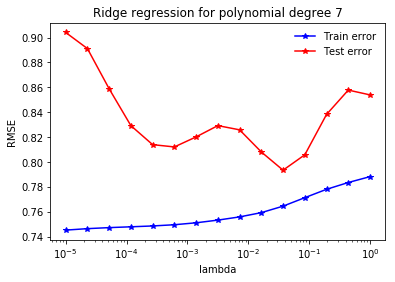

In [15]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    # ridge regression with different lambda
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        weight = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weight)))

        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    
seed = 56
degree = 7
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)